In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from context import *

# Data visualisation

In the previous course, raw statistics have been computed to answer some questions about the dataset.
However, raw numbers are not always the best solution to understand data, and are rarely so to communicate this knowledge.
In particular, a famous dataset created by Anscomb shows 4 distributions which look similar under basic statistics but have extremely different properties.
As a result, plotting data is often a good step to better understand data.

![Anscombe quartet](../../figures/wikipedia_anscombe_quartet.svg)


We will use the [matplotlib](https://matplotlib.org/3.3.1/tutorials/index.html) library to see the data with our own eyes.
This is a low level library which requires a bit more code but allows a precise control of the different plotted elements.
There exist higher level librairies (seaborn, plotly) that allow to perform more beautiful plots with less code. 
However, matplotlib remains a standard to perform simple plot, so we will learn its basic features.

In [ ]:
fn = INTDIR / "OPEN_MEDIC_2019.parquet"
df = pd.read_parquet(fn)


print(df.shape)
df.head()

(1836084, 23)


atc1                           l_atc1 atc2                        l_atc2  \
0    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
1    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
2    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
3    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   
4    A  Système digestif et métabolisme  A01  PREPARATIONS STOMATOLOGIQUES   

   atc3                        l_atc3   atc4  \
0  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
1  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
2  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
3  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   
4  A01A  PREPARATIONS STOMATOLOGIQUES  A01AA   

                                   l_atc4     atc5           l_atc5  ...  \
0  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   
1  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   
2  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   
3  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   
4  MEDICAMENTS PROPHYLACTIQUES ANTICARIES  A01AA01  SODIUM FLUORURE  ...   

   gen_num age sexe  boites    rem     bse               l_psp_spe  \
0        0   0    1     113  53.31  191.53       MEDECINE GENERALE   
1        0   0    1     152  77.60  258.68               PEDIATRIE   
2        0   0    1      74  33.50  126.72  PRESCRIPTEURS SALARIES   
3        0   0    1      13   6.56   21.87                  AUTRES   
4        0   0    1     106  39.47  136.74       MEDECINE GENERALE   

                             l_ben_reg       name taux_rembourse  
0  Régions et Départements d'outre-mer  ZYMAFLUOR       0.278338  
1  Régions et Départements d'outre-mer  ZYMAFLUOR       0.299985  
2  Régions et Départements d'outre-mer  ZYMAFLUOR       0.264362  
3  Régions et Départements d'outre-mer  ZYMAFLUOR       0.299954  
4                        Ile-de-France  ZYMAFLUOR       0.288650  

[5 rows x 23 columns]

In [ ]:
no_atc = [x for x in df.columns if "ATC" not in x]

## Matplotlib

The base element of a graph in matplotlib is a `Figure`, which roughly represent a canvas in which there may be different slots for visualisations.
The `Figure` can contain one or many `Axes`, which are roughly equivalent to the slots for plots.
Finally, each  `Axes` object will contain many elements constituting the plot itself.
Many different visual objects can be drawn on the same `Axes`.
The following figure sums up this hierarchy of elements.

![](../../figures/pyplot_hierarchy.png)

Most of the time, we will focus of creating a single `Axes`, which may contains multiple drawings on top of each over, for comparison purposes.
Let's look at the type of basic graph that we can create.

## Line plot

The line plot is the most simple representation.
It consists in drawing a line between points, in the order they are provided.

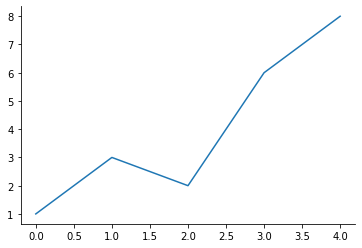

In [ ]:
fig, ax = plt.subplots() # Create the figure and Axes
ax.plot([1, 3, 2, 6, 8]);

If only a single list of numbers is provided to the plot functions, matplotlib will consider that each element has a value on the horizontal corresponding to its position in the list.
For example, the value 6 is the fourth element, so it will be printed at the position (3, 6).
Then a line is drawn between the points, in their order of appearance.

However, we can also provide matplotlib with the x values for each point.
The list of X and Y values must be provided separately.

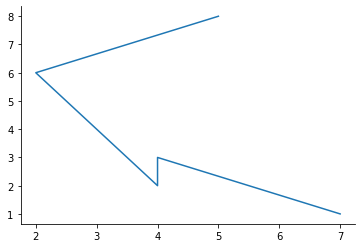

In [ ]:
fig, ax = plt.subplots()
ax.plot([7, 4, 4, 2, 5], [1, 3, 2, 6, 8]);

This is the way to draw a fonction of a single variable.

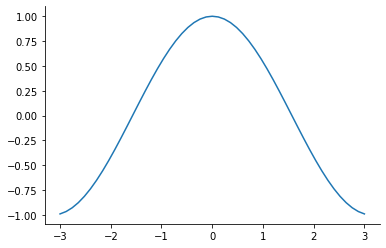

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-3, 3, 51)

# Compute element wise cosinus of all points
y = np.cos(x)

ax.plot(x, y);

In the previous course, we have observed some contradictory metrics : 
* 84% of refund rate globally
* 78% of mean refund rate per categories
* A standard deviation of 25%

These basic statistics give only a partial information about the dataset.
With experience, we can already understand many elements of the shape of the data.
As with the Anscomb quartet, plotting the data is one of the most powerful tool to understand the data.


## Histogram 

An histogram is a basic 1D representation of a continuous variable.
It counts how many instances fall into specified intervals, called bins, and represent this metric with a vertical bar chart.
Histograms are effective at quickly understanding how data is distributed.
It is possible to identify highly probable values, if the data are concentrated around a value or spread over a large range, etc...

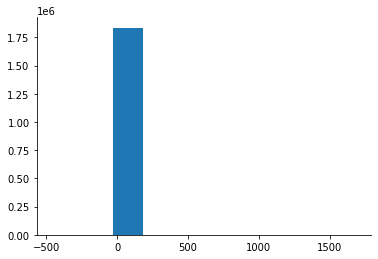

In [ ]:
fig, ax = plt.subplots()
ax.hist(
    df["taux_rembourse"],  # The data : here the list of all values
    bins=10,  # how may bins to we want between maximum and minimum
);

**What does this graph means?**

By default, matplotlib creates 10 intervals between the largest and the smallest value. 
All dataset lines are then stacked into their corresponding bin.
The graph means that almost all values fall into the bin around 0, while there should be at least one value around 1500 and another around -500.
These last values are not visible.
Indeed, the central bin has a value around two millions.
Imagine how small are the other bins if they only contain a couple of entries, or even a hundred.
We can however check that these values actually exist, and confirm our first observation.

In [ ]:
df.taux_rembourse.max(), df.taux_rembourse.min()

(1686.764705882353, -461.8913043478261)

We wanted to plot the rate of refund of all categories of medicine.
So we expect our values to be between 0 (no refund at all) and 1 (full refund).
It seems then that we have some aberrant values.
Let's look at them.

In [ ]:
df.loc[(df.taux_rembourse > 1) | (df.taux_rembourse < 0), no_atc]

atc1                           l_atc1 atc2  \
26801      A  Système digestif et métabolisme  A02   
45224      A  Système digestif et métabolisme  A02   
45941      A  Système digestif et métabolisme  A02   
48103      A  Système digestif et métabolisme  A02   
58180      A  Système digestif et métabolisme  A02   
...      ...                              ...  ...   
1745043    S               Organes sensoriels  S01   
1752374    S               Organes sensoriels  S01   
1787090    S               Organes sensoriels  S01   
1787091    S               Organes sensoriels  S01   
1787092    S               Organes sensoriels  S01   

                                             l_atc2  atc3  \
26801    MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE  A02B   
45224    MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE  A02B   
45941    MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE  A02B   
48103    MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE  A02B   
58180    MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE  A02B   
...                                             ...   ...   
1745043                MEDICAMENTS OPHTALMOLOGIQUES  S01A   
1752374                MEDICAMENTS OPHTALMOLOGIQUES  S01C   
1787090                MEDICAMENTS OPHTALMOLOGIQUES  S01X   
1787091                MEDICAMENTS OPHTALMOLOGIQUES  S01X   
1787092                MEDICAMENTS OPHTALMOLOGIQUES  S01X   

                                                    l_atc3   atc4  \
26801    MEDICAMENTS POUR L'ULCÈRE PEPTIQUE ET LE REFLU...  A02BC   
45224    MEDICAMENTS POUR L'ULCÈRE PEPTIQUE ET LE REFLU...  A02BC   
45941    MEDICAMENTS POUR L'ULCÈRE PEPTIQUE ET LE REFLU...  A02BC   
48103    MEDICAMENTS POUR L'ULCÈRE PEPTIQUE ET LE REFLU...  A02BC   
58180    MEDICAMENTS POUR L'ULCÈRE PEPTIQUE ET LE REFLU...  A02BC   
...                                                    ...    ...   
1745043                                     ANTIINFECTIEUX  S01AX   
1752374  ANTIINFLAMMATOIRES ET ANTIINFECTIEUX EN ASSOCI...  S01CA   
1787090                AUTRES MEDICAMENTS OPHTALMOLOGIQUES  S01XA   
1787091                AUTRES MEDICAMENTS OPHTALMOLOGIQUES  S01XA   
1787092                AUTRES MEDICAMENTS OPHTALMOLOGIQUES  S01XA   

                                               l_atc4     atc5  \
26801               INHIBITEURS DE LA POMPE A PROTONS  A02BC01   
45224               INHIBITEURS DE LA POMPE A PROTONS  A02BC01   
45941               INHIBITEURS DE LA POMPE A PROTONS  A02BC01   
48103               INHIBITEURS DE LA POMPE A PROTONS  A02BC01   
58180               INHIBITEURS DE LA POMPE A PROTONS  A02BC01   
...                                               ...      ...   
1745043                         AUTRES ANTIINFECTIEUX  S01AX16   
1752374  CORTICOIDES ET ANTIINFECTIEUX EN ASSOCIATION  S01CA01   
1787090           AUTRES MEDICAMENTS OPHTALMOLOGIQUES  S01XA02   
1787091           AUTRES MEDICAMENTS OPHTALMOLOGIQUES  S01XA02   
1787092           AUTRES MEDICAMENTS OPHTALMOLOGIQUES  S01XA02   

                                  l_atc5  ...  gen_num age sexe  boites  \
26801                         OMEPRAZOLE  ...      309  20    1      13   
45224                         OMEPRAZOLE  ...        0  20    1      72   
45941                         OMEPRAZOLE  ...        0  20    1      61   
48103                         OMEPRAZOLE  ...        0  20    1      13   
58180                         OMEPRAZOLE  ...      309  20    1      77   
...                                  ...  ...      ...  ..  ...     ...   
1745043                      PICLOXYDINE  ...        0  20    1      20   
1752374  DEXAMETHASONE ET ANTIINFECTIEUX  ...        0  20    1      20   
1787090                          RETINOL  ...        0  20    1      44   
1787091                          RETINOL  ...        0  20    1      52   
1787092                          RETINOL  ...        0  20    1      73   

            rem     bse               l_psp_spe  l_ben_reg        name  \
26801     -0.33   37.82      

There are 463 lines which do not valid our basic understanding.
This is very small compared to the overal size of the dataset; we will then remove those lines from further analysis.
We can give pyplot arbitrary limits for all bins.
Points outside of the most extreme limits are not taken into account.

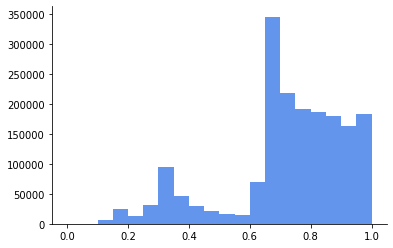

In [ ]:
plt.hist(
    df.taux_rembourse,
    # create the bin limits, 21 values between 0 and 1 included, generate 20 bins
    bins=np.linspace(0, 1, 21),
    color="cornflowerblue",  # change the color
);

Now we can get a better understanding at how good is the refund system.
We see that a majority of categories are refund with at least 60%.
There is however a minority of categories which have a much lower refund level.
So far, trying to plot the data distribution lead to new questions :
* Why is there values larger than 1 and below 0 ?
* Is here a reason why there is an abrupt discontinuity around 60% of refund?
* What causes lower refunds?

This could be axes of studies in this dataset.
The inputs from experts may be required.

Let's look specicifically at the DOLIPRANE.
We can plot multiple distributions on the same graph by just calling multiple times the same plotting function with different data.
We can set the parameter `alpha` to make each plot partially transparent, and see the first drawn distributions.

In [ ]:
is_doliprane = df.l_cip13.str.startswith("DOLIPRANE")

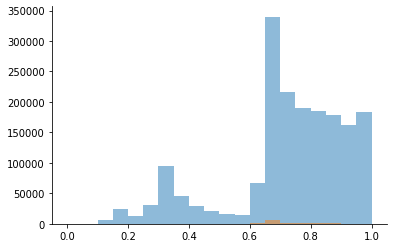

In [ ]:
fig, ax = plt.subplots()
opts = dict(
    bins=np.linspace(0, 1, 21),
    # make each histogram half transparent
    alpha=0.5,
)
ax.hist(
    df.loc[~is_doliprane, "taux_rembourse"],
    # is equivalent to key=value for all valrus of the dictionary
    **opts
)
ax.hist(df.loc[is_doliprane, "taux_rembourse"], **opts);

Even though doliprane has many packages and is prescribed by many specialties to all the population, it still represents only a very small fraction of the total dataset.
It is then difficult to see if doliprane has the same behaviour as the rest.
We can then set the density parameter, which ensures that the area of both histograms are the same.

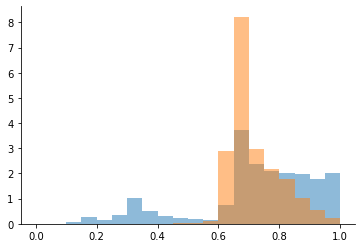

In [ ]:
fig, ax = plt.subplots()
opts = dict(
    bins=np.linspace(0, 1, 21),
    density=True,  # make all histogram integrals equal 1
    alpha=0.5,
)

ax.hist(df.loc[~is_doliprane, "taux_rembourse"], **opts)
ax.hist(df.loc[is_doliprane, "taux_rembourse"], **opts);

When more than two distributions are represented, it becomes complicated to see which shape represents which histogram when they are superimposed.
Instead, it is a bit more practical to draw histograms as lines.

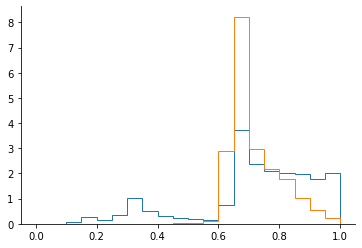

In [ ]:
fig, ax = plt.subplots()
opts = dict(
    bins=np.linspace(0, 1, 21),
    density=True,
    # do not fill the rectangles
    histtype="step",
)

ax.hist(df.loc[~is_doliprane, "taux_rembourse"], **opts)
ax.hist(df.loc[is_doliprane, "taux_rembourse"], **opts);

## Bar graph

Histogram is effective at representing numerical data.
However, we also have categorical variables in our dataset, such as the prescriptor of the medicine.
We already computed the number of doliprane per prescriptor.
But showing those data into a simple numerical table make it difficult for stakeholders to fully comprehend the situation; even more so if they are not familiar with the data.
Instead, there are better ways to effectively represent those variables.

Bar graphs propose to plot a simple rectangle for each category, which length will be proportional to the value attributed to each categorical instance.
Then each category will have its own rectangle and we can compare the relative sizes to compare the categories.

In [ ]:
mask = df.l_cip13.str.startswith("DOLIPRANE ")

In [ ]:
g = (
    df[mask]
    .groupby("l_psp_spe")
    .agg({"boites": np.sum})
    .sort_values("boites", ascending=True)
)
print(len(g))
g

25


boites
l_psp_spe                                      
ANATOMIE-CYTOLOGIE-PATHOLOGIQUE             831
DIRECTEUR LABORATOIRE MEDECIN              1729
MEDECINE PHYSIQUE ET DE READAPTATION      99855
NEUROLOGIE                               186106
NEPHROLOGIE                              191488
DERMATOLOGIE ET VENEROLOGIE              197579
PNEUMOLOGIE                              199152
VALEUR INCONNUE                          222461
GASTRO-ENTEROLOGIE ET HEPATOLOGIE        251090
ANESTHESIOLOGIE - REANIMATION            279240
MEDECINE INTERNE                         289134
ENDOCRINOLOGIE ET METABOLISMES           296512
RADIOLOGIE                               309828
STOMATOLOGIE                             332571
OPHTALMOLOGIE                            411513
PSYCHIATRIE                              451750
OTO RHINO-LARYNGOLOGIE                   499627
PATHOLOGIE CARDIO-VASCULAIRE             607518
GYNECOLOGIE OBSTETRIQUE                  810049
RHUMATOLOGIE                            2349035
PEDIATRIE                               2826315
CHIRURGIE                               2858709
AUTRES                                  3204817
PRESCRIPTEURS SALARIES                 35304151
MEDECINE GENERALE                     217951151

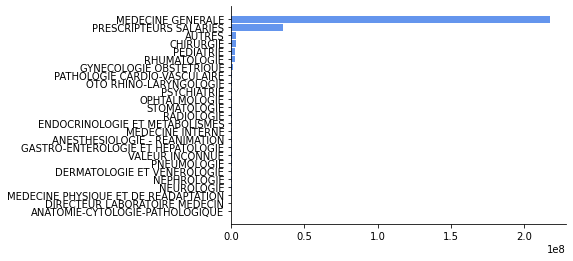

In [ ]:
plt.barh(g.index.values, g["boites"].values, color="cornflowerblue");

Here, the y axis represents all the categories of our dataset.
We have 25 different values and we can see that it starts to be too much for this figure size.
To have a better visualisation we can either increase the height of the picture, or keep only the top n most interesting categories which will fit in the graph.

Let's lookg now at the x axis.
The length of the bar represents the corresponding value.
Here, more than 2 millions boxes of doliprane have been prescribed by general medicine.
Then it falls quite fast, so much that it is impossible to determine how much was prescribed by other specialties.
In order to see them, we can either remove the first values, or plot the x axis in log scale.
Then we can observe the different orders of magnitude of each element.

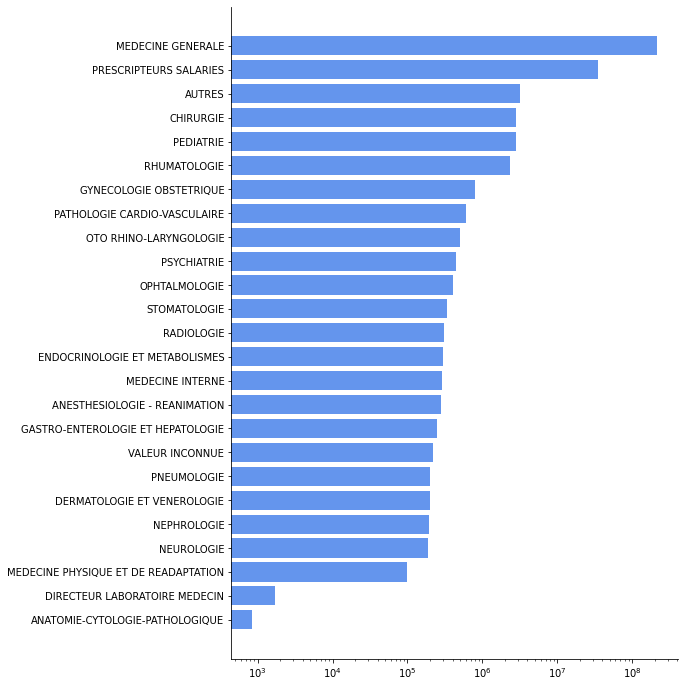

In [ ]:
fig, ax = plt.subplots(figsize=(8, 12))  # Default is 8x6
ax.barh(g.index.values, g["boites"].values, color="cornflowerblue")
ax.set_xscale("log");

Finally, we represented these data horizontally because it is easier to read the labels.
However, matplotlib proposes exactly the same process with vertical bars.

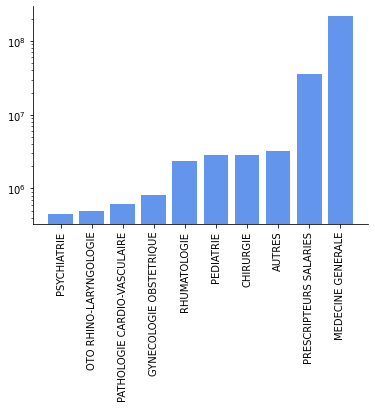

In [ ]:
fig, ax = plt.subplots()
ax.bar(g.iloc[-10:].index.values, g.iloc[-10:]["boites"].values, color="cornflowerblue")
ax.set_yscale("log")
ax.tick_params(axis="x", labelrotation=90);

We can also produce a similar plot using a bar line.

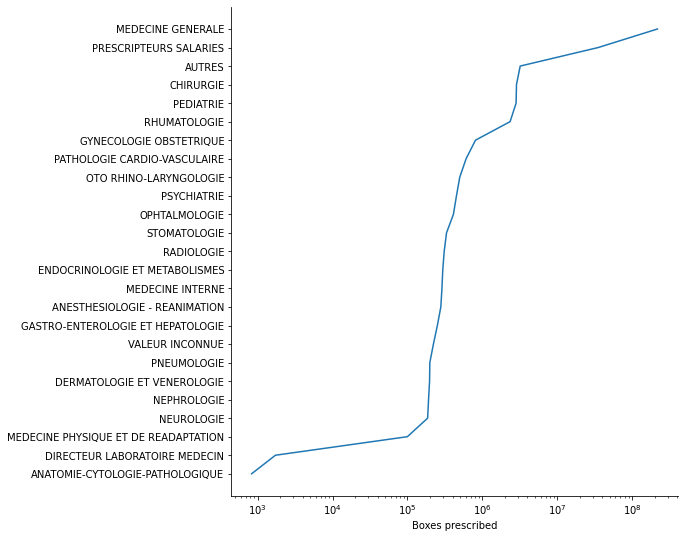

In [ ]:
fig, ax = plt.subplots(figsize=(8, 9))
ax.plot(g.values, range(len(g)))
ax.set_yticks(range(len(g)))
ax.set_yticklabels(g.index)
ax.set_xscale("log")
ax.set_xlabel("Boxes prescribed");

## Scatter plot
Scatter plot are the representation of all the combinations of two variables in the dataset.
The purpose is to basically plot each point in a 2D representation, which allows to see the shape of the density of the data in this space.

In [ ]:
all_meds = df.groupby("l_cip13").agg({"boites": np.sum, "bse": np.mean})
all_meds

boites           bse
l_cip13                                                                 
A313 50 000 UI CAPSULE 30                            42577  4.034247e+02
A313 POMMADE 1                                          29  2.334500e+01
ABACAVIR MYL 300MG CPR 60                             2823  1.294704e+04
ABACAVIR SDZ 300MG CPR 60                              115  2.719070e+03
ABACAVIR/LAM BGA 600 MG/300 MG CPR 30                16777  3.680885e+04
...                                                    ...           ...
ZYPREXA VELOTAB 5MG CPR 28                           37806  6.309014e+03
ZYRTEC 10 MG (DICHLORHYDRATE DE CETIRIZINE) 1 BOIT      44  5.503500e+01
ZYRTEC 10MG/ML BUV FL 15ML 1                         65671  7.249387e+02
ZYTIGA 250 MG CPR 120                                 3985  2.013024e+05
ZYTIGA 500 MG CPR 60                                 74061  1.856029e+06

[12021 rows x 2 columns]

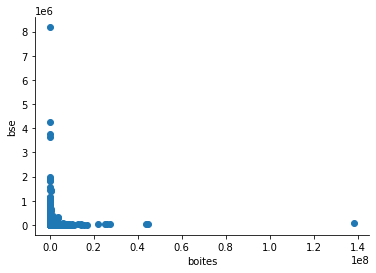

In [ ]:
fig, ax = plt.subplots()
ax.scatter(all_meds["boites"], all_meds["bse"])
ax.set_xlabel("boites")
ax.set_ylabel("bse");

For each line of our dataset, a scatter plot adds a single point at the corresponding x and y axes.
We then can observe that one medicine has sold around 140 million boxes but the the amount refunded is way below 1 million euros.

Still, because of the difference of scale between different medicine, we can't see much of the behaviour of the majority of medicines.
For that purpose, we need again to go to log scale, and set transparency in order to have an idea of the density of the points.
A single point will be almost transparent, while zones with many points will be opaque.

We can also plot different categories on top of each over.

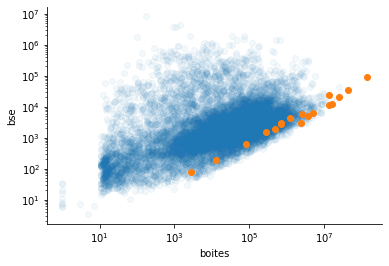

In [ ]:
is_doliprane = all_meds.index.str.startswith("DOLIPRANE")

fig, ax = plt.subplots()

ax.scatter(
    np.maximum(all_meds.loc[~is_doliprane, "boites"], 1),
    np.abs(all_meds.loc[~is_doliprane, "bse"]),
    alpha=0.05,
)


ax.scatter(
    np.maximum(all_meds.loc[is_doliprane, "boites"], 1),
    np.abs(all_meds.loc[is_doliprane, "bse"]),
    alpha=1,
)
ax.set_xlabel("boites")
ax.set_ylabel("bse")
ax.set_xscale("log")
ax.set_yscale("log")

**What can we observe**
* The dots for DOLIPRANE are roughly aligned, meaning that all different packagings of doliprane have the same rate of refund
* The boxes of DOLIPRANE are at the lower frontier of the distribution, meaning that for a given number of sold boxes, doliprane are among the medicine which generate the less amount of refund. Hence, either the doliprane has a very low rate of refund per boxes, or the doliprane is cheap, or a combination of both.

## Heatmap

We have seen in the exploration dataset that we can represent a metric as a function of two categorical variables by using a pivot table.
However, this kind of visualisation may be a bit complex to analyse when there are many columns and lines.
Instead, we can leverage the ability of the eye to detect pattern.
We will keep the same pivot table, but encode values with a color scale.
The higher the value, the lighter the color.
This will help to quickly see the distribution of values and estimate the relation between the two categorical variables.

Let's first create a pivot table with the number of Doliprane sold as a function of medical specialty and region.

In [ ]:
table = pd.pivot_table(
    df[df.l_cip13.str.startswith("DOLIPRANE")],
    index="l_psp_spe",
    columns="l_ben_reg",
    values="boites",
    aggfunc=np.sum,
    fill_value=0,
).astype(np.int32)
table

l_ben_reg                             Alsace-Champagne-Ardenne-Lorraine  \
l_psp_spe                                                                 
ANATOMIE-CYTOLOGIE-PATHOLOGIQUE                                       0   
ANESTHESIOLOGIE - REANIMATION                                     11520   
AUTRES                                                           211711   
CHIRURGIE                                                        179650   
DERMATOLOGIE ET VENEROLOGIE                                       14248   
DIRECTEUR LABORATOIRE MEDECIN                                         0   
ENDOCRINOLOGIE ET METABOLISMES                                     7999   
GASTRO-ENTEROLOGIE ET HEPATOLOGIE                                 13742   
GYNECOLOGIE OBSTETRIQUE                                           51419   
MEDECINE GENERALE                                              17960540   
MEDECINE INTERNE                                                  24983   
MEDECINE PHYSIQUE ET DE READAPTATION                              10142   
NEPHROLOGIE                                                        7475   
NEUROLOGIE                                                         9199   
OPHTALMOLOGIE                                                     24250   
OTO RHINO-LARYNGOLOGIE                                            32521   
PATHOLOGIE CARDIO-VASCULAIRE                                      18644   
PEDIATRIE                                                        256901   
PNEUMOLOGIE                                                       11081   
PRESCRIPTEURS SALARIES                                          2273712   
PSYCHIATRIE                                                       30645   
RADIOLOGIE                                                        15462   
RHUMATOLOGIE                                                     112245   
STOMATOLOGIE                                                       9998   
VALEUR INCONNUE                                                    8548   

l_ben_reg                             Aquitaine-Limousin-Poitou-Charentes  \
l_psp_spe                                                                   
ANATOMIE-CYTOLOGIE-PATHOLOGIQUE                                         0   
ANESTHESIOLOGIE - REANIMATION                                       31211   
AUTRES                                                             296079   
CHIRURGIE                                                          283503   
DERMATOLOGIE ET VENEROLOGIE                                         16285   
DIRECTEUR LABORATOIRE MEDECIN                                           0   
ENDOCRINOLOGIE ET METABOLISMES                                      11774   
GASTRO-ENTEROLOGIE ET HEPATOLOGIE                                   22171   
GYNECOLOGIE OBSTETRIQUE                                             63616   
MEDECINE GENERALE                                                22249042   
MEDECINE INTERNE                                                    10107   
MEDECINE PHYSIQUE ET DE READAPTATION                                11190   
NEPHROLOGIE                                                         15676   
NEUROLOGIE                                                          11673   
OPHTALMOLOGIE                                                       42762   
OTO RHINO-LARYNGOLOGIE                                              48325   
PATHOLOGIE CARDIO-VASCULAIRE                                        20221   
PEDIATRIE                                                          145489   
PNEUMOLOGIE                                                         13012   
PRESCRIPTEURS SALARIES                                            2139970   
PSYCHIATRIE                                                         33912   
RADIOLOGIE                                                          25944   
RHUMATOLOGIE                                                       134202   
STOMATOLOGIE                                     

There is no nice and easy way to draw a heatmap in matplotlib.
seaborn for example provide this API.
Instead, we will steal a code from stack overflow.
This code is available in the source code provided in this project. 
See the course about good practices to understand where is find this code.

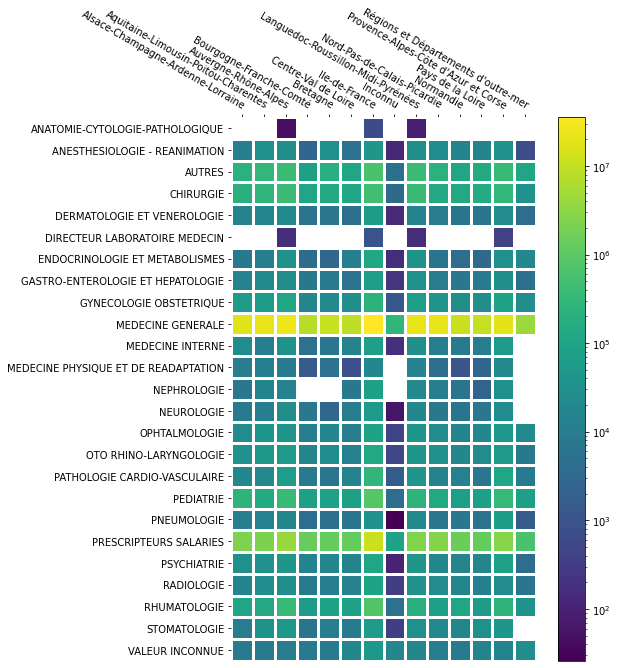

In [ ]:
from src.visualization.utils import heatmap
heatmap(table, list(table.index), list(table.columns), figsize=(8, 10), norm=matplotlib.colors.LogNorm());

Here, each square represents a combination of a specialty and a region.
The color of the square represent the number of boxes, from black for 0 boxes (nephrologie in Bourgogne) to more than 10 millions for medecine generale in Ile de france.
Here, we used again a log scale for the colors.
White boxes represent categories where the number of boxes is 0.
Indeed, the log function is only defined for strictly positive values.

# Conclusion

In this lesson, we presented the most basic ways to visually represent data.
This step is extremely important for the analyst as visualisation can play a crucial role in understanding the data, both for the new information it brings but also for the ease of interpretation.

Those basic plots will also play a major role at the end of a project : the communication of results.
Most analyses are directed toward non experts people.
Then, they need a simple and comprehensible way to understand what the analyst had a hard time to learn.
The good practices course will enter in more detail on the importance of visualisation in a project report.